<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%203/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Data Analysis with Python

Estimated time needed: **30** minutes

## Objectives

After completing this lab you will be able to:

*   Explore features or charecteristics to predict Patient's Vital Status.


<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="https://#import_data">Import Data from Module</a></li>
    <li><a href="https://#pattern_visualization">Analyzing Individual Feature Patterns using Visualization</a></li>
    <li><a href="https://#discriptive_statistics">Descriptive Statistical Analysis</a></li>
    <li><a href="https://#basic_grouping">Basics of Grouping</a></li>
    <li><a href="https://#correlation_causation">Correlation and Causation</a></li>
    <li><a href="https://#anova">ANOVA</a></li>
</ol>

</div>

<hr>


<h3>What are the main characteristics that have the most impact on a Patient's Vital Status?</h3>


<h2 id="import_data">1. Import Data from Module 2</h2>


<h4>Setup</h4>


you are running the lab in your  browser, so we will install the libraries using `piplite`


In [1]:
# #you are running the lab in your  browser, so we will install the libraries using ``piplite``
# import piplite
# await piplite.install(['pandas'])
# await piplite.install(['matplotlib'])
# await piplite.install(['scipy'])
# await piplite.install(['seaborn'])


Import libraries:


If you run the lab locally using Anaconda, you can load the correct library and versions by uncommenting the following:


In [2]:
#If you run the lab locally using Anaconda, you can load the correct library and versions by uncommenting the following:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2
#! mamba install scipy=1.7.1-y
#!  mamba install seaborn=0.9.0-y

In [3]:
import pandas as pd
import numpy as np
import preprocessing as preprocessing

This function will download the dataset into your browser


In [4]:
# #This function will download the dataset into your browser
#
# from pyodide.http import pyfetch
#
# async def download(url, filename):
#     response = await pyfetch(url)
#     if response.status == 200:
#         with open(filename, "wb") as f:
#             f.write(await response.bytes())


Load the data and store it in dataframe `df`:


This dataset was hosted on IBM Cloud object. Click <a href="https://cocl.us/DA101EN_object_storage?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01">HERE</a> for free storage.


In [5]:
path='breast_cancer_clean.csv'

you will need to download the dataset; if you are running locally, please comment out the following


\#you will need to download the dataset; if you are running locally, please comment out the following
await download(path, "breast_cancer_clean.csv")
path="breast_cancer_clean.csv"


In [6]:
# await download(path, "breast_cancer_clean.csv")
filename="breast_cancer_clean.csv"

In [7]:

df = pd.read_csv(filename, index_col=0)
df.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Tumor Size,Tumor Stage,Patient's Vital Status,Overall Survival (Years),Relapse Free Status (Years),Nottingham prognostic index-binned,Inferred Menopausal State-Post,Inferred Menopausal State-Pre,Relapse Free Status-Not Recurred,Relapse Free Status-Recurred
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,False,claudin-low,1,Positve,...,0.116022,2,Living,11.708333,11.554167,High,1,0,1,0
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,False,LumA,1,Positve,...,0.049724,1,Living,7.052778,6.960000,Medium,0,1,1,0
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,True,LumB,1,Positve,...,0.077348,2,Died of Disease,13.641667,12.606667,Medium,0,1,0,1
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,True,LumB,1,Positve,...,0.132597,2,Living,13.744444,13.563333,Medium,0,1,1,0
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,True,LumB,1,Positve,...,0.215470,2,Died of Disease,3.447222,1.545833,High,1,0,0,1


Let's use "pd.options.display.float_format = '{:,.2f}'.format" for the display of float numbers in Pandas with two decimal places, separated by a comma.

In [8]:
pd.options.display.float_format = '{:,.2f}'.format


<h2 id="pattern_visualization">2. Analyzing Individual Feature Patterns Using Visualization</h2>


To install Seaborn we use pip, the Python package manager.


Import visualization packages "Matplotlib" and "Seaborn". Don't forget about "%matplotlib inline" to plot in a Jupyter notebook.


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<h4>How to choose the right visualization method?</h4>
<p>When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.</p>


In [10]:
# list the data types for each column
print(df.dtypes)

Patient ID                             object
Age at Diagnosis                      float64
Type of Breast Surgery                 object
Cancer Type                            object
Cancer Type Detailed                   object
Cellularity                            object
Chemotherapy                             bool
Pam50 + Claudin-low subtype            object
Cohort                                  int64
ER status measured by IHC              object
ER Status                              object
Neoplasm Histologic Grade               int64
HER2 status measured by SNP6           object
HER2 Status                            object
Tumor Other Histologic Subtype         object
Hormone Therapy                          bool
Integrative Cluster                    object
Primary Tumor Laterality               object
Lymph nodes examined positive           int64
Mutation Count                          int64
Nottingham prognostic index             int64
Oncotree Code                     

We need to transform the categorical column "Patient's Vital Status" so that we can work with it as a column of type Int. The "transform" method is used to transform the original categorical column into an array of integers, which is assigned to the variable transformed_vital_stat. Finally, a new column is created in the dataframe called "Patient's Vital Status - transformed" and its values are set to the transformed categorical data.

In [11]:
from sklearn import preprocessing

enc = preprocessing.OrdinalEncoder()
enc.fit(df[["Patient's Vital Status"]])

#Write down to array
transformed_vital_stat = enc.transform(df[["Patient's Vital Status"]])

#Create new column
df["Patient's Vital Status - transformed"] = transformed_vital_stat

df

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Tumor Stage,Patient's Vital Status,Overall Survival (Years),Relapse Free Status (Years),Nottingham prognostic index-binned,Inferred Menopausal State-Post,Inferred Menopausal State-Pre,Relapse Free Status-Not Recurred,Relapse Free Status-Recurred,Patient's Vital Status - transformed
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,False,claudin-low,1,Positve,...,2,Living,11.71,11.55,High,1,0,1,0,2.00
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,False,LumA,1,Positve,...,1,Living,7.05,6.96,Medium,0,1,1,0,2.00
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,True,LumB,1,Positve,...,2,Died of Disease,13.64,12.61,Medium,0,1,0,1,0.00
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,True,LumB,1,Positve,...,2,Living,13.74,13.56,Medium,0,1,1,0,2.00
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,True,LumB,1,Positve,...,2,Died of Disease,3.45,1.55,High,1,0,0,1,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,MTS-T2428,70.05,Mastectomy,Breast Cancer,Invasive Breast Carcinoma,High,False,LumA,1,Positve,...,1,Living,10.44,0.41,Low,1,0,0,1,2.00
2505,MTS-T2429,63.60,Mastectomy,Breast Cancer,Invasive Breast Carcinoma,High,False,LumA,1,Positve,...,2,Living,10.44,1.35,Medium,1,0,0,1,2.00
2506,MTS-T2430,60.42,Mastectomy,Breast Cancer,Invasive Breast Carcinoma,High,False,LumA,1,Positve,...,0,Living,10.44,9.07,Medium,1,0,1,0,2.00
2507,MTS-T2431,60.42,Mastectomy,Breast Cancer,Invasive Breast Carcinoma,High,False,LumA,1,Positve,...,0,Living,10.44,9.07,Medium,1,0,1,0,2.00


Now we have a new column "Vital status of the patient - changed", which contains the following values: 0 - Died of Disease, 1 - Died of Other Causes, 2 - Living.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h3>Question  #1:</h3>

<b>What is the data type of the column "Tumor Size"? </b>

</div>


In [12]:
# Write your code below and press Shift+Enter to execute


<details><summary>Click here for the solution</summary>

```python
df['Tumor Size'].dtypes
```

</details>


For example, we can calculate the correlation between variables  of type "int64" or "float64" using the method "corr":


In [13]:
corr = df.corr()
corr

C:\Users\Dima\AppData\Local\Temp\ipykernel_7340\949583003.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Age at Diagnosis,Chemotherapy,Cohort,Neoplasm Histologic Grade,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Radio Therapy,Relapse Free Status (Months),Tumor Size,Tumor Stage,Overall Survival (Years),Relapse Free Status (Years),Inferred Menopausal State-Post,Inferred Menopausal State-Pre,Relapse Free Status-Not Recurred,Relapse Free Status-Recurred,Patient's Vital Status - transformed
Age at Diagnosis,1.00,-0.34,-0.06,-0.11,0.21,0.02,0.03,-0.09,-0.13,-0.14,-0.10,0.06,0.06,-0.13,-0.10,0.62,-0.62,0.07,-0.07,-0.17
Chemotherapy,-0.34,1.00,-0.13,0.23,-0.22,0.27,-0.04,0.39,-0.16,0.13,-0.12,0.18,0.25,-0.16,-0.12,-0.37,0.37,-0.13,0.13,-0.16
Cohort,-0.06,-0.13,1.00,-0.05,0.03,-0.08,0.08,-0.13,0.05,-0.01,0.03,-0.01,0.05,0.05,0.03,0.08,-0.08,0.03,-0.03,0.07
Neoplasm Histologic Grade,-0.11,0.23,-0.05,1.00,-0.05,0.13,0.04,0.55,-0.10,0.09,-0.11,0.14,0.11,-0.10,-0.11,-0.07,0.07,-0.11,0.11,-0.11
Hormone Therapy,0.21,-0.22,0.03,-0.05,1.00,0.08,-0.13,0.11,-0.09,0.21,-0.07,0.05,0.16,-0.09,-0.07,0.34,-0.34,0.02,-0.02,0.14
Lymph nodes examined positive,0.02,0.27,-0.08,0.13,0.08,1.00,-0.03,0.52,-0.22,0.08,-0.22,0.26,0.34,-0.22,-0.22,-0.03,0.03,-0.23,0.23,-0.23
Mutation Count,0.03,-0.04,0.08,0.04,-0.13,-0.03,1.00,0.01,0.04,-0.09,0.03,0.02,-0.00,0.04,0.03,-0.00,0.00,-0.01,0.01,-0.06
Nottingham prognostic index,-0.09,0.39,-0.13,0.55,0.11,0.52,0.01,1.00,-0.22,0.19,-0.19,0.25,0.45,-0.22,-0.19,-0.09,0.09,-0.22,0.22,-0.21
Overall Survival (Months),-0.13,-0.16,0.05,-0.10,-0.09,-0.22,0.04,-0.22,1.00,-0.00,0.82,-0.17,-0.21,1.00,0.82,-0.06,0.06,0.28,-0.28,0.41
Radio Therapy,-0.14,0.13,-0.01,0.09,0.21,0.08,-0.09,0.19,-0.00,1.00,-0.01,0.01,0.06,-0.00,-0.01,0.02,-0.02,-0.00,0.00,0.20


The diagonal elements are always one; we will study correlation more precisely Pearson correlation in-depth at the end of the notebook.


Let's take a look on correlation heatmap of our data

<AxesSubplot: >

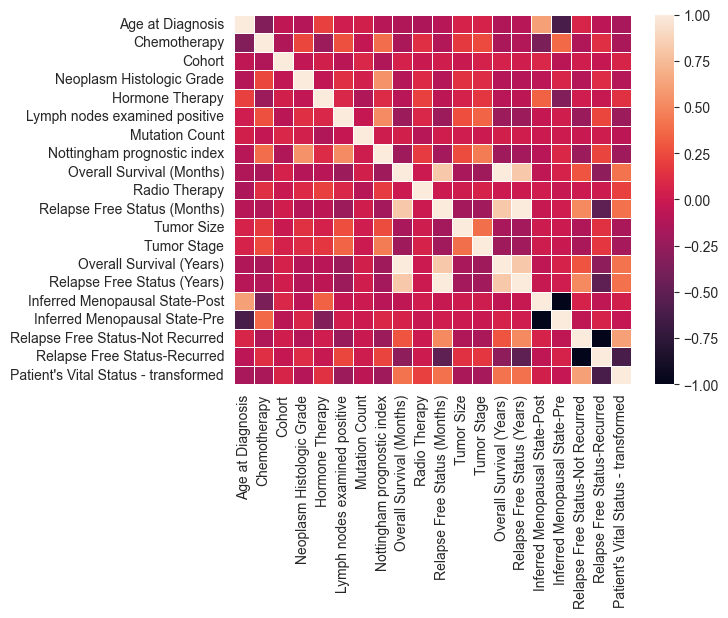

In [14]:
sns.heatmap(corr, linewidths=.5)

The associations method from the dython.nominal library is used to calculate and visualize the association between the categorical variables in a Pandas dataframe.

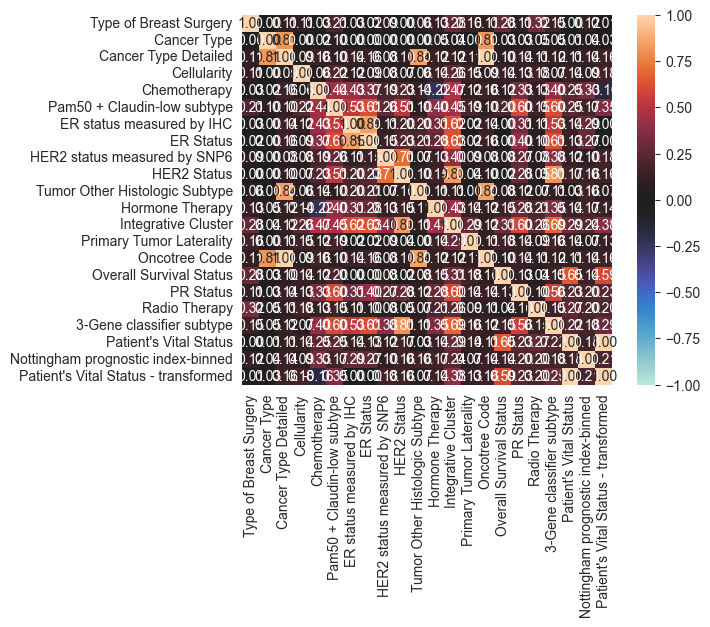

{'corr':                                       Type of Breast Surgery  Cancer Type  \
 Type of Breast Surgery                                  1.00         0.00   
 Cancer Type                                             0.00         1.00   
 Cancer Type Detailed                                    0.11         0.81   
 Cellularity                                             0.11         0.00   
 Chemotherapy                                            0.03         0.02   
 Pam50 + Claudin-low subtype                             0.21         0.10   
 ER status measured by IHC                               0.03         0.00   
 ER Status                                               0.02         0.00   
 HER2 status measured by SNP6                            0.09         0.00   
 HER2 Status                                             0.00         0.00   
 Tumor Other Histologic Subtype                          0.06         0.00   
 Hormone Therapy                                        

In [15]:
from dython.nominal import associations
associations(df[["Type of Breast Surgery", "Cancer Type", "Cancer Type Detailed", "Cellularity", "Chemotherapy", "Pam50 + Claudin-low subtype", "ER status measured by IHC", "ER Status", "HER2 status measured by SNP6", "HER2 Status", "Tumor Other Histologic Subtype", "Hormone Therapy", "Integrative Cluster", "Primary Tumor Laterality", "Oncotree Code", "Overall Survival Status", "PR Status", "Radio Therapy", "3-Gene classifier subtype", "Patient's Vital Status", "Nottingham prognostic index-binned", "Patient's Vital Status - transformed"]])

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h3> Question  #2: </h3>

<p>Find the correlation between the following columns: Tumor Size, Cohort, Neoplasm Histologic Grade, and Mutation Count.</p>
<p>Hint: if you would like to select those columns, use the following syntax: df[['Tumor Size', 'Cohort', 'Neoplasm Histologic Grade', 'Mutation Count']]</p>
</div>


In [16]:
# Write your code below and press Shift+Enter to execute


<details><summary>Click here for the solution</summary>

```python
df[['Tumor Size', 'Cohort', 'Neoplasm Histologic Grade', 'Mutation Count']].corr()
```

</details>


<h2>Continuous Numerical Variables:</h2> 

<p>Continuous numerical variables are variables that may contain any value within some range. They can be of type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.</p>

<p>In order to start understanding the (linear) relationship between an individual variable and the price, we can use "regplot" which plots the scatterplot plus the fitted regression line for the data.</p>

<p>For forecasting, we selected column "Patient's Vital Status - transformed", but this column has only 3 values. Therefore, we will take other columns in order to show what examples of graphs exist.</p>


Let's see several examples of different linear relationships:


<h3>Positive Linear Relationship</h4>


Let's find the scatterplot of "Lymph nodes examined positive" and "Nottingham prognostic index".


(0.0, 12.018532479042888)

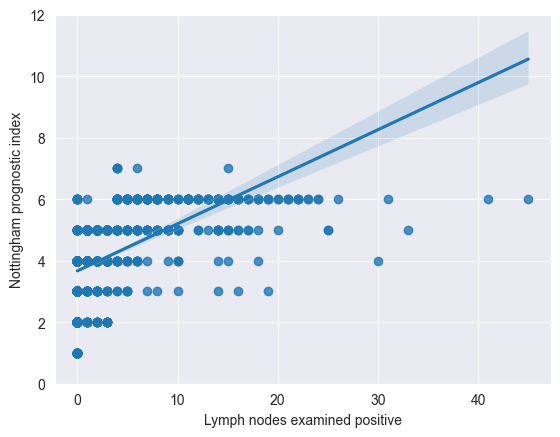

In [17]:
# Engine size as potential predictor variable of price
sns.regplot(x="Lymph nodes examined positive", y="Nottingham prognostic index", data=df)
plt.ylim(0,)

<p>As the Lymph nodes examined positive goes up, the Nottingham prognostic index goes up: this indicates a positive direct correlation between these two variables. Lymph nodes examined positive seems like a pretty good predictor of Nottingham prognostic index since the regression line is almost a perfect diagonal line.</p>


We can examine the correlation between 'Lymph nodes examined positive' and 'Nottingham prognostic index' and see that it's approximately 0.52.


In [18]:
df[["Lymph nodes examined positive", "Nottingham prognostic index"]].corr()

,Lymph nodes examined positive,Nottingham prognostic index
Lymph nodes examined positive,1.00,0.52
Nottingham prognostic index,0.52,1.00


Lymph nodes examined positive is a potential predictor variable of Relapse Free Status (Years). Let's find the scatterplot of "Lymph nodes examined positive" and "Relapse Free Status (Years)".


<AxesSubplot: xlabel='Lymph nodes examined positive', ylabel='Relapse Free Status (Years)'>

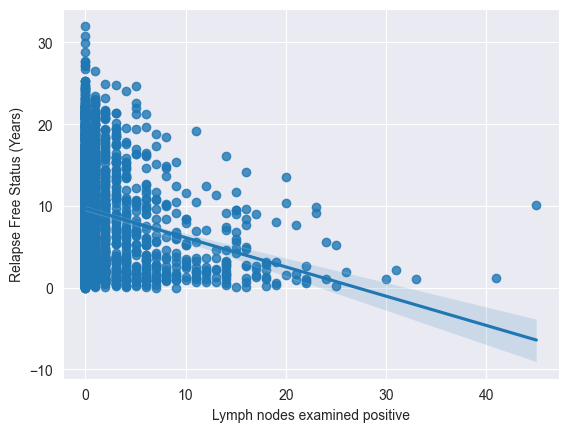

In [19]:
sns.regplot(x="Lymph nodes examined positive", y="Relapse Free Status (Years)", data=df)

<p>As Lymph nodes examined positive goes up, the Relapse Free Status (Years) goes down: this indicates an inverse/negative relationship between these two variables. Lymph nodes examined positive could potentially be a predictor of Relapse Free Status (Years).</p>


We can examine the correlation between 'Lymph nodes examined positive' and 'Relapse Free Status (Years)' and see it's approximately -0.22.


In [20]:
df[["Lymph nodes examined positive", "Relapse Free Status (Years)"]].corr()

,Lymph nodes examined positive,Relapse Free Status (Years)
Lymph nodes examined positive,1.00,-0.22
Relapse Free Status (Years),-0.22,1.00


<h3>Weak Linear Relationship</h3>


Let's see if "Tumor Size" is a predictor variable of "Mutation Count".


<AxesSubplot: xlabel='Tumor Size', ylabel='Mutation Count'>

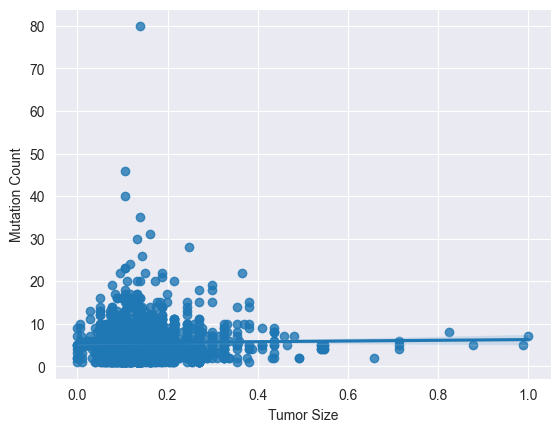

In [21]:
sns.regplot(x="Tumor Size", y="Mutation Count", data=df)

<p>Tumor Size does not seem like a good predictor of the Mutation Count at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.</p>


We can examine the correlation between 'Tumor Size' and 'Mutation Count' and see it's approximately 0.02.


In [22]:
df[["Tumor Size", "Mutation Count"]].corr()

,Tumor Size,Mutation Count
Tumor Size,1.00,0.02
Mutation Count,0.02,1.00


 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  3 a): </h1>

<p>Find the correlation  between x="Relapse Free Status (Months)" and y="Age at Diagnosis".</p>
<p>Hint: if you would like to select those columns, use the following syntax: df[["Relapse Free Status (Months)", "Age at Diagnosis"]].  </p>
</div>


In [23]:
# Write your code below and press Shift+Enter to execute


<details><summary>Click here for the solution</summary>

```python

#The correlation is 0.0823, the non-diagonal elements of the table.

df[["Relapse Free Status (Months)","Age at Diagnosis"]].corr()

```

</details>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  3 b):</h1>

<p>Given the correlation results between "Age at Diagnosis" and "Relapse Free Status (Months)", do you expect a linear relationship?</p>
<p>Verify your results using the function "regplot()".</p>
</div>


In [24]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python

#There is a weak correlation between the variable 'stroke' and 'price.' as such regression will not work well. We can see this using "regplot" to demonstrate this.

#Code: 
sns.regplot(x="Relapse Free Status (Months)", y="Age at Diagnosis", data=df)

```

</details>


<h3>Categorical Variables</h3>

<p>These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.</p>


Let's look at the relationship between "Integrative Cluster" and "Overall Survival (Years)".


<AxesSubplot: xlabel='Integrative Cluster', ylabel='Overall Survival (Years)'>

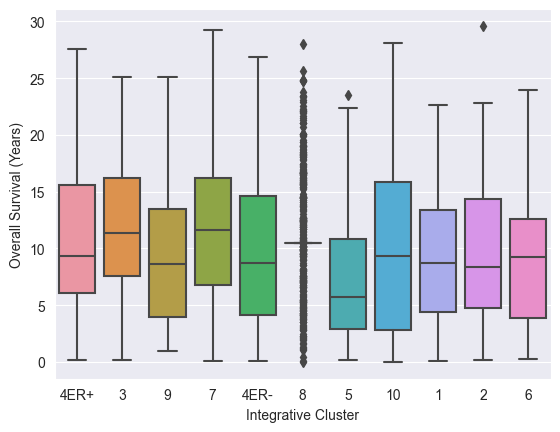

In [25]:
sns.boxplot(x="Integrative Cluster", y="Overall Survival (Years)", data=df)

<p>We see that the distributions of Overall Survival (Years) between the different Integrative Cluster categories have a significant overlap, so Integrative Cluster would not be a good predictor of Overall Survival (Years). If you have many points that are distributed along the Y axis in your boxplot, it suggests that the data in that column has a large spread or variability. It can be seen in cluster "8" that we have different from others.

Let's examine engine "Tumor Stage" and "Patient's Vital Status - transformed":</p>


<AxesSubplot: xlabel='Tumor Stage', ylabel="Patient's Vital Status - transformed">

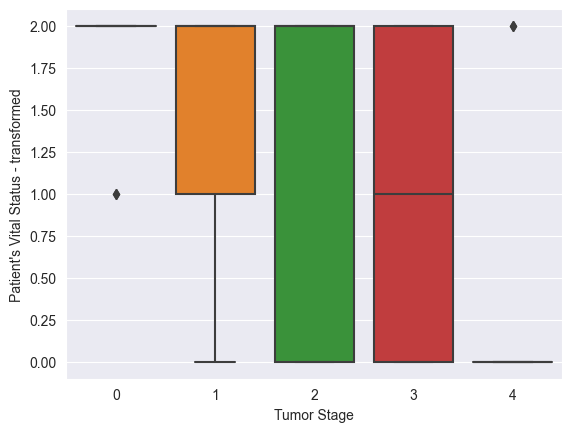

In [26]:
sns.boxplot(x="Tumor Stage", y="Patient's Vital Status - transformed", data=df)

<p>Here we see that the categories are potentially distributed well, but with stages 0 and 4 there may be a question. Stage 0 is the lightest form of the tumor, so its mortality is the lowest, stage 4 is the most advanced stage of the tumor, so its survival rate is the lowest.</p>


Let's examine "Nottingham prognostic index-binned" and "Overall Survival (Years)".


<AxesSubplot: xlabel='Nottingham prognostic index-binned', ylabel='Overall Survival (Years)'>

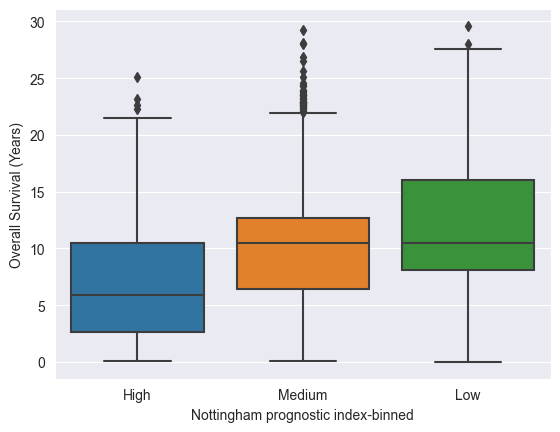

In [27]:
sns.boxplot(x="Nottingham prognostic index-binned", y="Overall Survival (Years)", data=df)

<p>Here we see that the distribution of price between the different Nottingham prognostic index-binned categories differs. As such, Nottingham prognostic index-binned could potentially be a predictor of Overall Survival (Years).</p>


<h2 id="discriptive_statistics">3. Descriptive Statistical Analysis</h2>


<p>Let's first take a look at the variables by utilizing a description method.</p>

<p>The <b>describe</b> function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.</p>

This will show:

<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li> 
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>


We can apply the method "describe" as follows:


In [28]:
df.describe()

,Age at Diagnosis,Cohort,Neoplasm Histologic Grade,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Relapse Free Status (Months),Tumor Size,Tumor Stage,Overall Survival (Years),Relapse Free Status (Years),Inferred Menopausal State-Post,Inferred Menopausal State-Pre,Relapse Free Status-Not Recurred,Relapse Free Status-Recurred,Patient's Vital Status - transformed
count,"2,509.00","2,509.00","2,509.00","2,509.00","2,509.00","2,509.00","2,509.00","2,509.00","2,509.00","2,509.00","2,509.00","2,509.00","2,509.00","2,509.00","2,509.00","2,509.00","2,509.00"
mean,60.42,2.89,2.44,1.74,5.54,3.94,125.24,108.84,0.14,1.80,10.44,9.07,0.83,0.17,0.60,0.40,1.29
std,13.00,1.96,0.65,3.85,3.85,1.13,67.63,74.65,0.08,0.57,5.64,6.22,0.37,0.37,0.49,0.49,0.85
min,21.93,1.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,50.94,1.00,2.00,0.00,3.00,3.00,76.23,42.60,0.09,1.00,6.35,3.55,1.00,0.00,0.00,0.00,0.00
50%,61.05,3.00,3.00,0.00,5.00,4.00,125.24,104.14,0.13,2.00,10.44,8.68,1.00,0.00,1.00,0.00,2.00
75%,70.00,4.00,3.00,2.00,7.00,5.00,164.33,163.19,0.16,2.00,13.69,13.60,1.00,0.00,1.00,1.00,2.00
max,96.29,9.00,3.00,45.00,80.00,7.00,355.20,384.21,1.00,4.00,29.60,32.02,1.00,1.00,1.00,1.00,2.00


The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type 'object' as follows:


In [29]:
df.describe(include=['object'])

,Patient ID,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Pam50 + Claudin-low subtype,ER status measured by IHC,ER Status,HER2 status measured by SNP6,HER2 Status,Tumor Other Histologic Subtype,Integrative Cluster,Primary Tumor Laterality,Oncotree Code,Overall Survival Status,PR Status,Sex,3-Gene classifier subtype,Patient's Vital Status,Nottingham prognostic index-binned
count,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509
unique,2509,2,2,8,3,7,2,2,4,2,8,11,2,8,2,2,1,4,3,3
top,MB-0000,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumA,Positve,Positive,Neutral,Negative,Ductal/NST,8,Left,IDC,Deceased,Positive,Female,ER+/HER2- Low Prolif,Living,Medium
freq,1,1724,2506,1865,1557,1229,1900,1865,1965,2262,1945,828,1612,1865,1672,1569,2509,1385,1366,1478


<h3>Value Counts</h3>


<p>Value counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column "Radio Therapy". Don’t forget the method "value_counts" only works on pandas series, not pandas dataframes. As a result, we only include one bracket <code>df['Radio Therapy']</code>, not two brackets <code>df[['Radio Therapy']]</code>.</p>


In [30]:
df['Radio Therapy'].value_counts()

True     1702
False     807
Name: Radio Therapy, dtype: int64

We can convert the series to a dataframe as follows:


In [31]:
df['Radio Therapy'].value_counts().to_frame()

,Radio Therapy
True,1702
False,807


Let's repeat the above steps but save the results to the dataframe "radio_therapy_counts" and rename the column  'Radio Therapy' to 'value_counts'.


In [32]:
radio_therapy_counts = df['Radio Therapy'].value_counts().to_frame()
radio_therapy_counts.rename(columns={'Radio Therapy': 'value_counts'}, inplace=True)
radio_therapy_counts

,value_counts
True,1702
False,807


Now let's rename the index to 'Radio Therapy':


In [33]:
radio_therapy_counts.index.name = 'Radio Therapy'
radio_therapy_counts

,value_counts
Radio Therapy,
True,1702
False,807


We can repeat the above process for the variable 'Tumor Stage'.


In [34]:
# Tumor Stage as variable
engine_loc_counts = df['Tumor Stage'].value_counts().to_frame()
engine_loc_counts.rename(columns={'Tumor Stage': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'Tumor Stage'
engine_loc_counts.head(10)

,value_counts
Tumor Stage,
2,1700
1,630
3,144
0,24
4,11


<p>After examining the value counts of the Tumor Stage, we see that Tumor Stage would not be a good predictor variable for the Patient's Vital Status. This is because we only have 11 patiets with 4th Tumor Stage and 24 patients with 0 Tumor Stage, so this result is skewed. Thus, we are not able to draw any conclusions about the Tumor Stage.</p>


<h2 id="basic_grouping">4. Basics of Grouping</h2>


<p>The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.</p>

<p>For example, let's group by the variable "Nottingham prognostic index". We see that there are 7 different categories of Nottingham prognostic index.</p>


In [35]:
df['Nottingham prognostic index'].unique()

array([6, 4, 5, 3, 2, 1, 7], dtype=int64)

<p>If we want to know, on average, which type of drive wheel is most valuable, we can group "Nottingham prognostic index" and then average them.</p>

<p>We can select the columns 'Radio Therapy', 'Nottingham prognostic index' and 'Patient's Vital Status - transformed', then assign it to the variable "df_group_one".</p>


In [36]:
df_group_one = df[['Radio Therapy','Nottingham prognostic index',"Patient's Vital Status - transformed"]]

We can then calculate the average Patient's Vital Status for each of the different categories of data.


In [37]:
# grouping results
df_group_one = df_group_one.groupby(['Radio Therapy'],as_index=False).mean()
df_group_one

,Radio Therapy,Nottingham prognostic index,Patient's Vital Status - transformed
0,False,3.63,1.05
1,True,4.08,1.40


<p>From our data, it seems "True" Radio Therapy are, on average, the highest survival rate.</p>

<p>You can also group by multiple variables. For example, let's group by both 'Radio Therapy' and 'Nottingham prognostic index'. This groups the dataframe by the unique combination of 'Radio Therapy' and 'Nottingham prognostic index'. We can store the results in the variable 'grouped_test1'.</p>


In [38]:
# grouping results
df_gptest = df[['Radio Therapy','Nottingham prognostic index',"Patient's Vital Status - transformed"]]
grouped_test1 = df_gptest.groupby(['Radio Therapy','Nottingham prognostic index'],as_index=False).mean()
grouped_test1

,Radio Therapy,Nottingham prognostic index,Patient's Vital Status - transformed
0,False,1,1.32
1,False,2,1.25
2,False,3,1.22
3,False,4,0.99
4,False,5,0.84
5,False,6,0.37
6,True,1,1.70
7,True,2,1.69
8,True,3,1.48
9,True,4,1.57


<p>This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot" to create a pivot table from the groups.</p>

<p>In this case, we will leave the Radio Therapy variable as the rows of the table, and pivot Nottingham prognostic index to become the columns of the table:</p>


In [39]:
grouped_pivot = grouped_test1.pivot(index='Radio Therapy',columns='Nottingham prognostic index')
grouped_pivot

Patient's Vital Status - transformed            \
Nottingham prognostic index                                    1    2    3   
Radio Therapy                                                                
False                                                       1.32 1.25 1.22   
True                                                        1.70 1.69 1.48   

                                                 
Nottingham prognostic index    4    5    6    7  
Radio Therapy                                    
False                       0.99 0.84 0.37  NaN  
True                        1.57 1.19 0.77 2.00

<p>Often, we won't have data for some of the pivot cells. We can fill these missing cells with empty value, but any other value could potentially be used as well. It should be mentioned that missing data is quite a complex subject and is an entire course on its own.</p>


In [40]:
grouped_pivot = grouped_pivot.fillna('') #fill missing values with empty value
grouped_pivot

Patient's Vital Status - transformed            \
Nottingham prognostic index                                    1    2    3   
Radio Therapy                                                                
False                                                       1.32 1.25 1.22   
True                                                        1.70 1.69 1.48   

                                                 
Nottingham prognostic index    4    5    6    7  
Radio Therapy                                    
False                       0.99 0.84 0.37       
True                        1.57 1.19 0.77 2.00

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question 4:</h1>

<p>Use the "groupby" function to find the average "Patient's Vital Status" of each patient based on "Nottingham prognostic index".</p>
</div>


In [41]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
# grouping results
df_gptest2 = df[['Nottingham prognostic index',"Patient's Vital Status - transformed"]]
grouped_test_bodystyle = df_gptest2.groupby(['Nottingham prognostic index'],as_index= False).mean()
grouped_test_bodystyle

```

</details>


If you did not import "pyplot", let's do it again.


In [42]:
import matplotlib.pyplot as plt
%matplotlib inline


<h4>Variables: Radio Therapy and Nottingham prognostic index vs. Patient's Vital Status</h4>


Let's use a heat map to visualize the relationship between Radio Therapy and Nottingham prognostic index vs Patient's Vital Status.


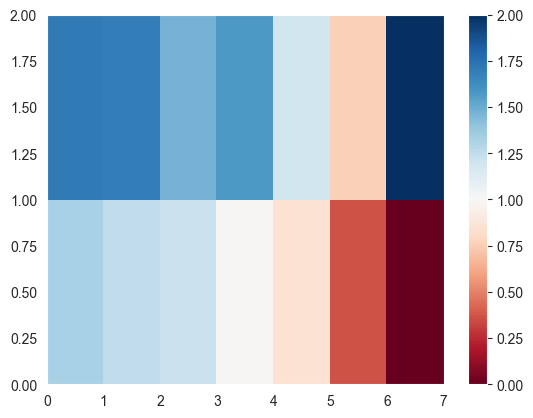

In [43]:
#use the grouped results
grouped_pivot = grouped_test1.pivot(index='Radio Therapy',columns='Nottingham prognostic index').fillna(0)
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

<p>The heatmap plots the target variable (Patient's Vital Status) proportional to colour with respect to the variables 'Radio Therapy' and 'Nottingham prognostic index' on the vertical and horizontal axis, respectively. This allows us to visualize how the Patient's Vital Status is related to 'Radio Therapy' and 'Nottingham prognostic index'.</p>

<p>The default labels convey no useful information to us. Let's change that:</p>


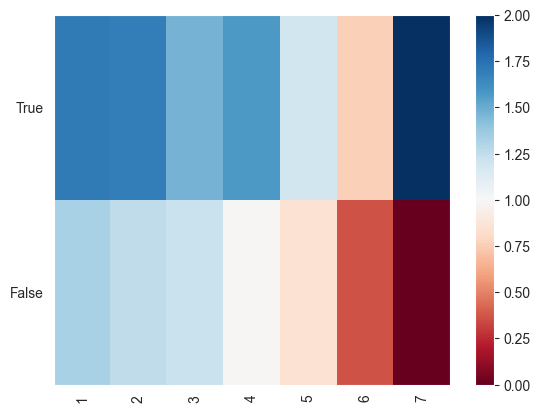

In [44]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<p>Visualization is very important in data science, and Python visualization packages provide great freedom. We will go more in-depth in a separate Python visualizations course.</p>

<p>The main question we want to answer in this module is, "What are the main characteristics which have the most impact on the Patient's Vital Status?".</p>

<p>To get a better measure of the important characteristics, we look at the correlation of these variables with the Patient's Vital Status. In other words: how is the Patient's Vital Status dependent on this variable?</p>


<h2 id="correlation_causation">5. Correlation and Causation</h2>


<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two. Correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>


<p><b>Pearson Correlation</b></p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>


<p>Pearson Correlation is the default method of the function "corr". Like before, we can calculate the Pearson Correlation of the of the 'int64' or 'float64'  variables.</p>


In [45]:
df.corr()

C:\Users\Dima\AppData\Local\Temp\ipykernel_7340\1886530979.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age at Diagnosis,Chemotherapy,Cohort,Neoplasm Histologic Grade,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Radio Therapy,Relapse Free Status (Months),Tumor Size,Tumor Stage,Overall Survival (Years),Relapse Free Status (Years),Inferred Menopausal State-Post,Inferred Menopausal State-Pre,Relapse Free Status-Not Recurred,Relapse Free Status-Recurred,Patient's Vital Status - transformed
Age at Diagnosis,1.00,-0.34,-0.06,-0.11,0.21,0.02,0.03,-0.09,-0.13,-0.14,-0.10,0.06,0.06,-0.13,-0.10,0.62,-0.62,0.07,-0.07,-0.17
Chemotherapy,-0.34,1.00,-0.13,0.23,-0.22,0.27,-0.04,0.39,-0.16,0.13,-0.12,0.18,0.25,-0.16,-0.12,-0.37,0.37,-0.13,0.13,-0.16
Cohort,-0.06,-0.13,1.00,-0.05,0.03,-0.08,0.08,-0.13,0.05,-0.01,0.03,-0.01,0.05,0.05,0.03,0.08,-0.08,0.03,-0.03,0.07
Neoplasm Histologic Grade,-0.11,0.23,-0.05,1.00,-0.05,0.13,0.04,0.55,-0.10,0.09,-0.11,0.14,0.11,-0.10,-0.11,-0.07,0.07,-0.11,0.11,-0.11
Hormone Therapy,0.21,-0.22,0.03,-0.05,1.00,0.08,-0.13,0.11,-0.09,0.21,-0.07,0.05,0.16,-0.09,-0.07,0.34,-0.34,0.02,-0.02,0.14
Lymph nodes examined positive,0.02,0.27,-0.08,0.13,0.08,1.00,-0.03,0.52,-0.22,0.08,-0.22,0.26,0.34,-0.22,-0.22,-0.03,0.03,-0.23,0.23,-0.23
Mutation Count,0.03,-0.04,0.08,0.04,-0.13,-0.03,1.00,0.01,0.04,-0.09,0.03,0.02,-0.00,0.04,0.03,-0.00,0.00,-0.01,0.01,-0.06
Nottingham prognostic index,-0.09,0.39,-0.13,0.55,0.11,0.52,0.01,1.00,-0.22,0.19,-0.19,0.25,0.45,-0.22,-0.19,-0.09,0.09,-0.22,0.22,-0.21
Overall Survival (Months),-0.13,-0.16,0.05,-0.10,-0.09,-0.22,0.04,-0.22,1.00,-0.00,0.82,-0.17,-0.21,1.00,0.82,-0.06,0.06,0.28,-0.28,0.41
Radio Therapy,-0.14,0.13,-0.01,0.09,0.21,0.08,-0.09,0.19,-0.00,1.00,-0.01,0.01,0.06,-0.00,-0.01,0.02,-0.02,-0.00,0.00,0.20


Sometimes we would like to know the significant of the correlation estimate.


<b>P-value</b>

<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


We can obtain this information using  "stats" module in the "scipy"  library.


In [46]:
from scipy import stats

<h3>Each column vs. Patient's Vital Status</h3>


Let's calculate the  Pearson Correlation Coefficient and P-value of different columns of float and int type and 'Patient's Vital Status'.


In [47]:
columns = df.select_dtypes(include=['int', 'float']).columns
columns = columns[:-1]

for c in columns:
    pearson_coef, p_value = stats.pearsonr(df[c], df["Patient's Vital Status - transformed"])
    print(c, ":\n Pearson Correlation Coefficient is", round(pearson_coef, 2), " with a P-value of P=", p_value)


Age at Diagnosis :
 Pearson Correlation Coefficient is -0.17  with a P-value of P= 2.9692319375471304e-17
Cohort :
 Pearson Correlation Coefficient is 0.07  with a P-value of P= 0.0006568963565774537
Neoplasm Histologic Grade :
 Pearson Correlation Coefficient is -0.11  with a P-value of P= 6.28833129191458e-08
Lymph nodes examined positive :
 Pearson Correlation Coefficient is -0.23  with a P-value of P= 1.745455653992416e-30
Mutation Count :
 Pearson Correlation Coefficient is -0.06  with a P-value of P= 0.0013581663115037267
Nottingham prognostic index :
 Pearson Correlation Coefficient is -0.21  with a P-value of P= 3.2340888847378533e-25
Overall Survival (Months) :
 Pearson Correlation Coefficient is 0.41  with a P-value of P= 2.298957681015951e-103
Relapse Free Status (Months) :
 Pearson Correlation Coefficient is 0.4  with a P-value of P= 9.673627341582878e-97
Tumor Size :
 Pearson Correlation Coefficient is -0.16  with a P-value of P= 9.20863293507354e-16
Tumor Stage :
 Pearson

<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between different columns and Patient's Vital Status is statistically significant, although the linear relationship isn't extremely strong. These columns are 'Overall Survival (Months)', 'Relapse Free Status (Months)', 'Relapse Free Status-Not Recurred', 'Relapse Free Status-Recurred', 'Lymph nodes examined positive'.
</p>


<h2 id="anova">6. ANOVA</h2>


<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant our calculated score value is.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.</p>


<h3>Nottingham prognostic index</h3>


<p>Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.</p>

<p>To see if different types of 'Nottingham prognostic index' impact  'Patient's Vital Status', we group the data.</p>


In [48]:
grouped_test2=df_gptest[['Nottingham prognostic index', "Patient's Vital Status - transformed"]].groupby(['Nottingham prognostic index'])
grouped_test2.head(2)

,Nottingham prognostic index,Patient's Vital Status - transformed
0,6,2.00
1,4,2.00
2,4,0.00
4,6,0.00
10,5,1.00
11,3,0.00
12,3,0.00
13,2,2.00
14,5,2.00
42,2,2.00


In [49]:
df_gptest

,Radio Therapy,Nottingham prognostic index,Patient's Vital Status - transformed
0,True,6,2.00
1,True,4,2.00
2,False,4,0.00
3,True,4,2.00
4,True,6,0.00
...,...,...,...
2504,True,2,2.00
2505,True,4,2.00
2506,True,4,2.00
2507,True,4,2.00


We can obtain the values of the method group using the method "get_group".


In [50]:
grouped_test2.get_group(1)["Patient's Vital Status - transformed"]

81     2.00
88     2.00
145    2.00
146    2.00
158    2.00
167    1.00
170    1.00
173    1.00
183    2.00
186    2.00
198    2.00
216    2.00
227    0.00
241    1.00
346    2.00
403    1.00
444    2.00
495    2.00
510    2.00
594    1.00
787    1.00
799    2.00
834    1.00
839    1.00
962    0.00
973    1.00
1058   2.00
1204   0.00
1245   2.00
1250   1.00
1260   2.00
1322   0.00
1434   1.00
1581   0.00
1785   1.00
1906   1.00
1923   1.00
1933   1.00
1944   1.00
1987   2.00
1988   2.00
1989   2.00
1991   2.00
1992   2.00
1994   2.00
1996   2.00
2000   2.00
2002   2.00
2008   2.00
2016   2.00
2017   2.00
2019   2.00
2020   2.00
2021   2.00
2022   2.00
Name: Patient's Vital Status - transformed, dtype: float64

We can use the function 'f_oneway' in the module 'stats' to obtain the <b>F-test score</b> and <b>P-value</b>.


In [51]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group(1)["Patient's Vital Status - transformed"], grouped_test2.get_group(2)["Patient's Vital Status - transformed"], grouped_test2.get_group(3)["Patient's Vital Status - transformed"], grouped_test2.get_group(4)["Patient's Vital Status - transformed"], grouped_test2.get_group(5)["Patient's Vital Status - transformed"], grouped_test2.get_group(6)["Patient's Vital Status - transformed"], grouped_test2.get_group(7)["Patient's Vital Status - transformed"])
 
print( "ANOVA results: F=", round(f_val, 2), ", P =", p_val)

ANOVA results: F= 31.29 , P = 1.890288853867347e-36


This is a great result with a large F-test score showing a strong correlation and a P-value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated?

Let's examine them separately.


To compare pairs of groups we can use `itertools`

In [52]:
import itertools
values = [1, 2, 3, 4, 5, 6, 7]
for a, b in itertools.combinations(values, 2):
    f_val, p_val = stats.f_oneway(grouped_test2.get_group(a)["Patient's Vital Status - transformed"], grouped_test2.get_group(b)["Patient's Vital Status - transformed"])
    print(a, "and", b, "ANOVA results: F=", round(f_val, 2), ", P =", p_val)

1 and 2 ANOVA results: F= 0.04 , P = 0.8506357558515518
1 and 3 ANOVA results: F= 1.74 , P = 0.1879238541234252
1 and 4 ANOVA results: F= 0.82 , P = 0.3655317494830096
1 and 5 ANOVA results: F= 10.34 , P = 0.0013781362441838557
1 and 6 ANOVA results: F= 41.72 , P = 4.802699461681403e-10
1 and 7 ANOVA results: F= 3.24 , P = 0.07700262875456623
2 and 3 ANOVA results: F= 3.58 , P = 0.05879408932703922
2 and 4 ANOVA results: F= 1.56 , P = 0.21185870949031727
2 and 5 ANOVA results: F= 26.48 , P = 3.5205994058510753e-07
2 and 6 ANOVA results: F= 97.26 , P = 1.135319500294762e-20
2 and 7 ANOVA results: F= 3.14 , P = 0.07820246102935671
3 and 4 ANOVA results: F= 1.1 , P = 0.29536623008868335
3 and 5 ANOVA results: F= 25.25 , P = 5.936511542283022e-07
3 and 6 ANOVA results: F= 109.47 , P = 4.450771676765233e-24
3 and 7 ANOVA results: F= 3.93 , P = 0.0480106534319924
4 and 5 ANOVA results: F= 43.01 , P = 7.520817777819471e-11
4 and 6 ANOVA results: F= 138.21 , P = 2.627305529519447e-30
4 and 7 A

Results represent that some of separately compared pairs of groups have different F and P value from other pairs. So only some of them are highly correlated

<h3>Conclusion: Important Variables</h3>


<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the Patient's Vital Status. We have narrowed it down to the following variables:</p>

Continuous numerical variables:

<ul>
    <li>Overall Survival (Months)</li>
    <li>Relapse Free Status (Months)</li>
    <li>Relapse Free Status-Not Recurred</li>
    <li>Relapse Free Status-Recurred</li>
    <li>Lymph nodes examined positive</li>
    <li>Nottingham prognostic index</li>
    <li>Tumor Stage</li>
</ul>

Categorical variables:

<ul>
    <li>Pam50 + Claudin-low subtype</li>
    <li>Integrative Cluster</li>
    <li>Overall Survival Status</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>


In [53]:
df.to_csv('breast_cancer_upd.csv')

Save the new csv:

> Note : The  csv file cannot be viewed in the jupyterlite based SN labs environment.However you can Click <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%202/DA0101EN-2-Review-Data-Wrangling.ipynb?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">HERE</a> to download the lab notebook (.ipynb) to your local machine and view the csv file once the notebook is executed.

### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Joseph Santarcangelo</a>

### Other Contributors

<a href="https://www.linkedin.com/in/mahdi-noorian-58219234/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Mahdi Noorian PhD</a>

Bahare Talayian

Eric Xiao

Steven Dong

Parizad

Hima Vasudevan

<a href="https://www.linkedin.com/in/fiorellawever/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Fiorella Wenver</a>

<a href="https:// https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>.

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                 |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 2020-10-30        | 2.1     | Lakshmi    | changed URL of csv                 |
| 2020-08-27        | 2.0     | Lavanya    | Moved lab to course repo in GitLab |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
